In [1]:
import inspect
import time
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from memory_profiler import memory_usage

import rankloss

In [2]:
print(inspect.getsource(rankloss.approx_ranks))

def approx_ranks(preds, alpha=100):
    """
    Computes approximate ranks
    """
    s_x, s_y = preds, preds
    s_xy = s_x.reshape(-1, 1) - s_y
    pairs = jnp.exp(-alpha*s_xy) / (1 + jnp.exp(-alpha*s_xy))
    return .5 + jnp.sum(pairs, axis=1)



In [3]:
print(inspect.getsource(rankloss.fast_approx_ranks))

def fast_approx_ranks(preds):
    """
    """
    return jax_ops.soft_rank(preds)



100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [11:05<00:00,  1.50it/s]


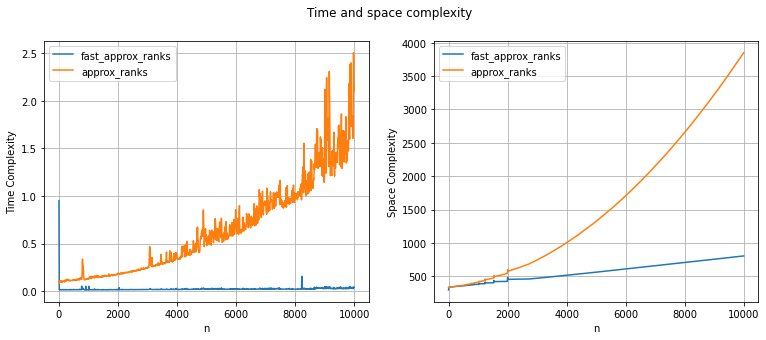

In [4]:
times_fast = []
times = []
spaces_fast = []
spaces = []
for n in tqdm(range(1, 10_000, 10)):
    preds = np.random.normal(size=n)

    start = time.time()
    space = max(memory_usage((rankloss.fast_approx_ranks, (preds,)), interval=.001))
    end = time.time()
    times_fast.append(end-start)
    spaces_fast.append(space)
    
    start = time.time()
    space = max(memory_usage((rankloss.approx_ranks, (preds,)), interval=.001))
    end = time.time()
    times.append(end-start)
    spaces.append(space)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*6.4, 4.8))
fig.suptitle('Time and space complexity')
ax1.set_xlabel('n')
ax1.set_ylabel('Time Complexity')
ax1.plot(range(1, 10_000, 10), times_fast, label='fast_approx_ranks')
ax1.plot(range(1, 10_000, 10), times, label='approx_ranks')
ax1.grid()
ax1.legend()
ax2.set_xlabel('n')
ax2.set_ylabel('Space Complexity')
ax2.plot(range(1, 10_000, 10), spaces_fast, label='fast_approx_ranks')
ax2.plot(range(1, 10_000, 10), spaces, label='approx_ranks')
ax2.grid()
ax2.legend()
plt.show()